## Diabetes

In [1]:
#importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [2]:
#carregando dados
data = pd.read_csv('https://raw.githubusercontent.com/netobrandao/Diabetespredictiondataset/refs/heads/main/diabetes_prediction_dataset.csv')
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
#verificando os dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
#criando copia do dataset para ser usado na analise exploratoria dos dados
dfanalysys = data.copy()

In [5]:
#transformando as variaveis numericas em categoricas
dfanalysys['hypertension'] = dfanalysys['hypertension'].astype(str)
dfanalysys['heart_disease'] = dfanalysys['heart_disease'].astype(str)
dfanalysys['diabetes'] = dfanalysys['diabetes'].astype(str)

In [6]:
#verificando os tipos das variaveis
dfanalysys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  object 
 3   heart_disease        100000 non-null  object 
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 6.9+ MB


In [7]:
#estatistica descritiva dos dados numericos
dfanalysys.describe()

,age,bmi,HbA1c_level,blood_glucose_level
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,27.320767,5.527507,138.058060
std,22.516840,6.636783,1.070672,40.708136
min,0.080000,10.010000,3.500000,80.000000
25%,24.000000,23.630000,4.800000,100.000000
50%,43.000000,27.320000,5.800000,140.000000
75%,60.000000,29.580000,6.200000,159.000000
max,80.000000,95.690000,9.000000,300.000000


In [8]:
#estatistica descritiva dos dados categoricos
dfanalysys.describe(exclude=np.number)

,gender,hypertension,heart_disease,smoking_history,diabetes
count,100000,100000,100000,100000,100000
unique,3,2,2,6,2
top,Female,0,0,No Info,0
freq,58552,92515,96058,35816,91500


## EDA (Analise Exploratoria dos Dados)

### Graficos de Frequencia

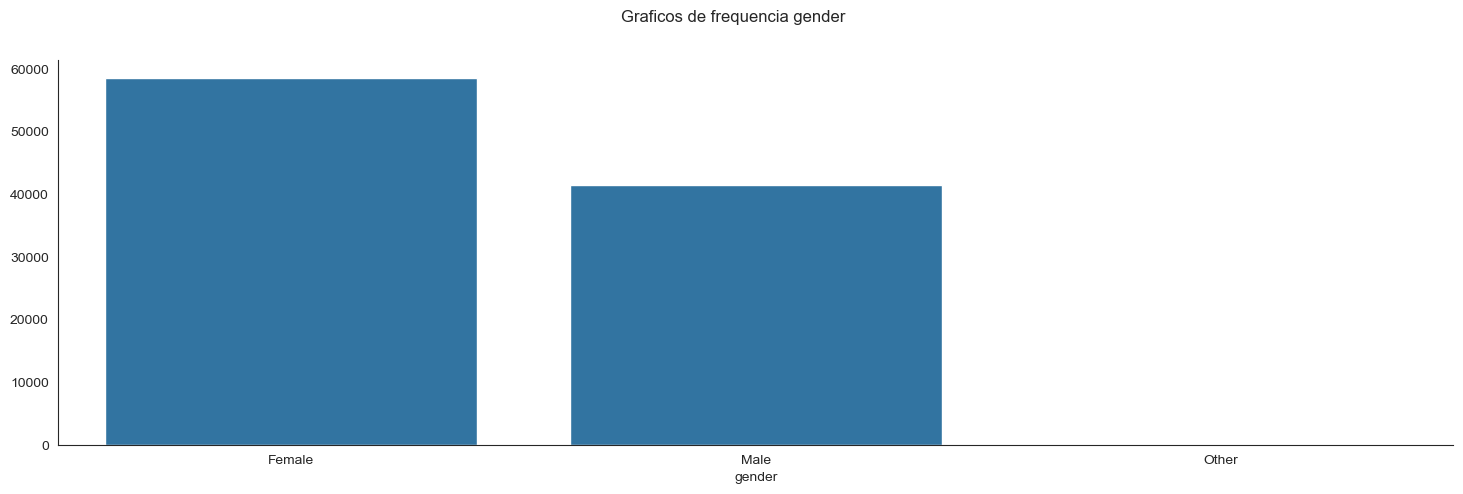

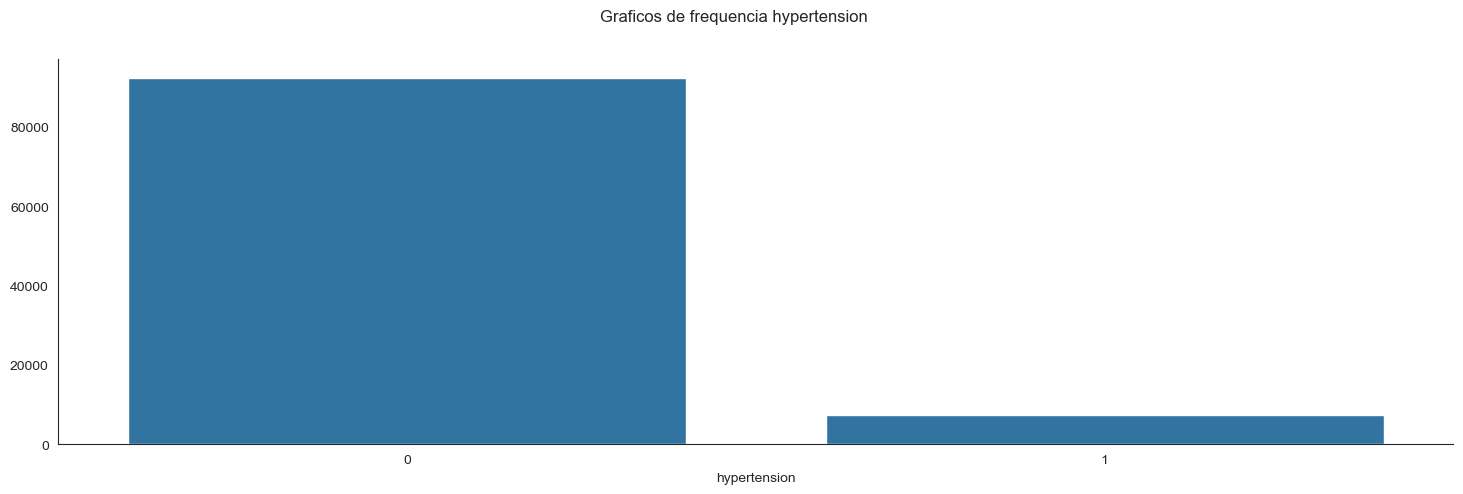

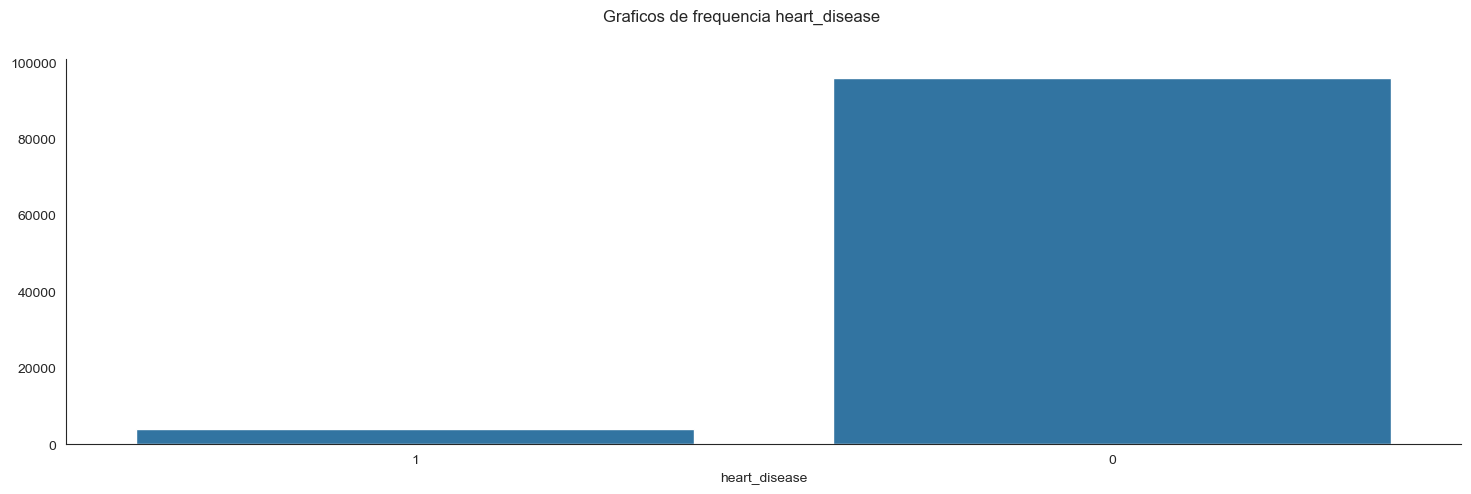

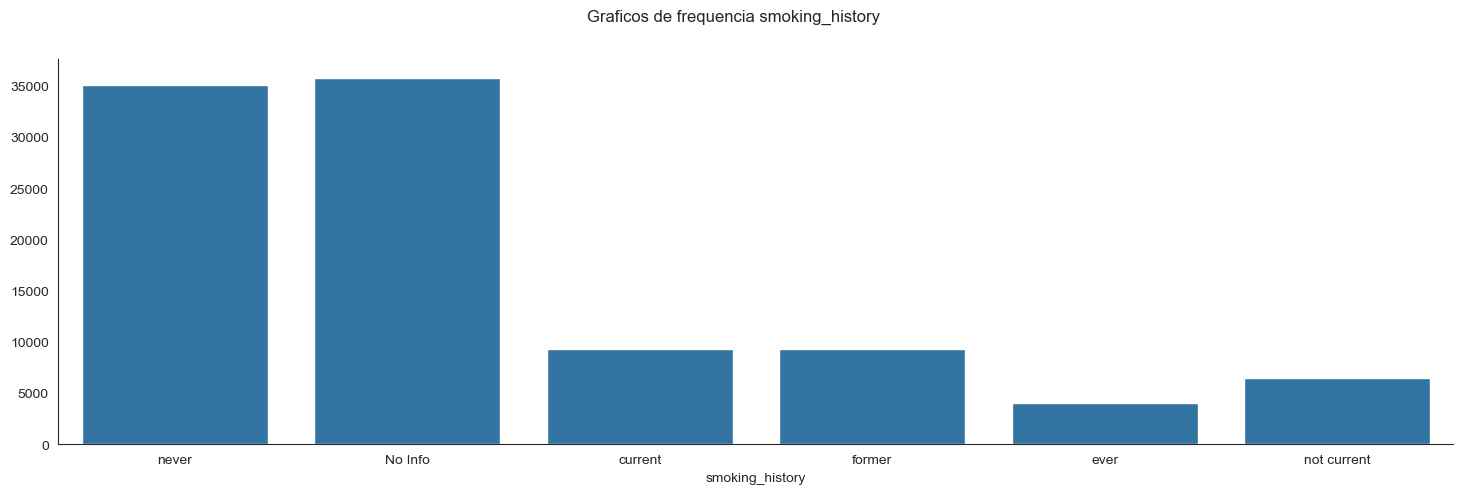

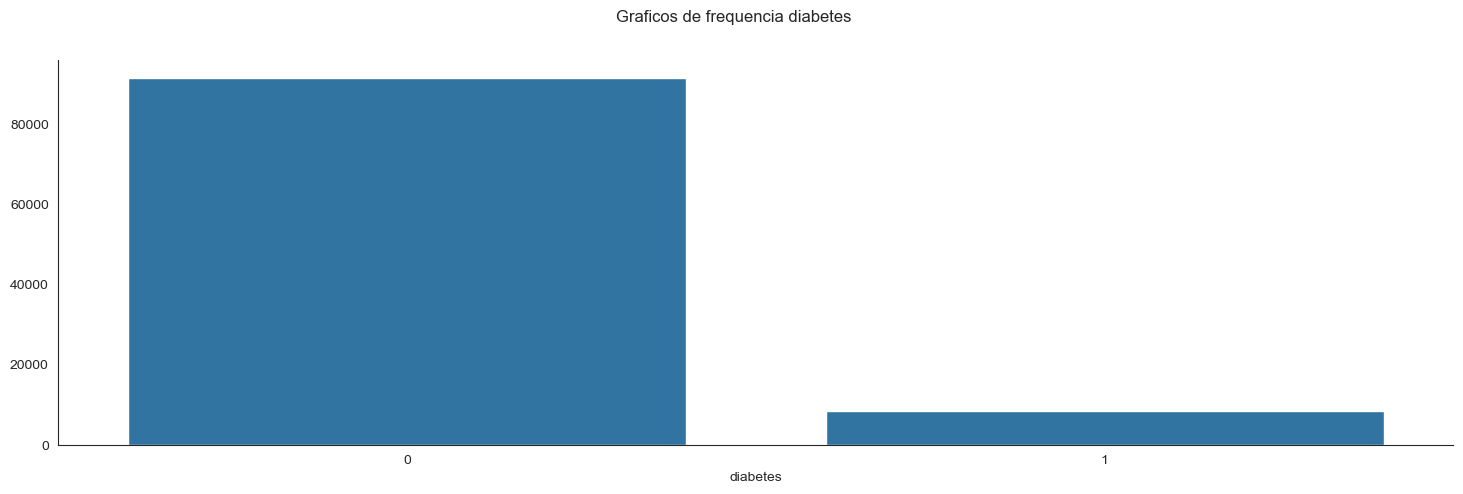

In [9]:
#graficos de frenquencia das variaveis categoricas

def frequency_viz(col):
    dfcat = dfanalysys.select_dtypes(exclude=np.number)
    for col in dfcat.columns:
        fig, axes = plt.subplots(1,1,figsize=(18,5))
        fig.suptitle(f"Graficos de frequencia {col}")

        sns.countplot(dfcat,x=col)
        axes.set_ylabel(None)
        sns.despine()

        plt.show()

frequency_viz(dfanalysys.select_dtypes(exclude=np.number).columns)


No geral, os dados mostram que a maioria das pessoas não apresentam problemas cardiacos e também não fazem o uso de cigarro

### Graficos de Distribuição

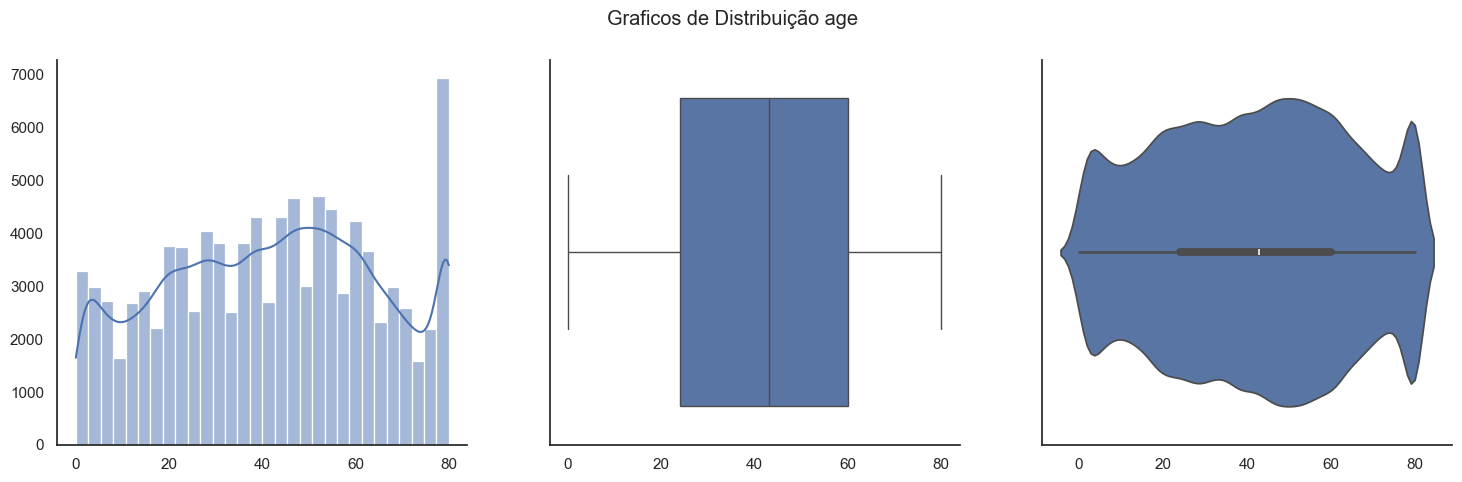

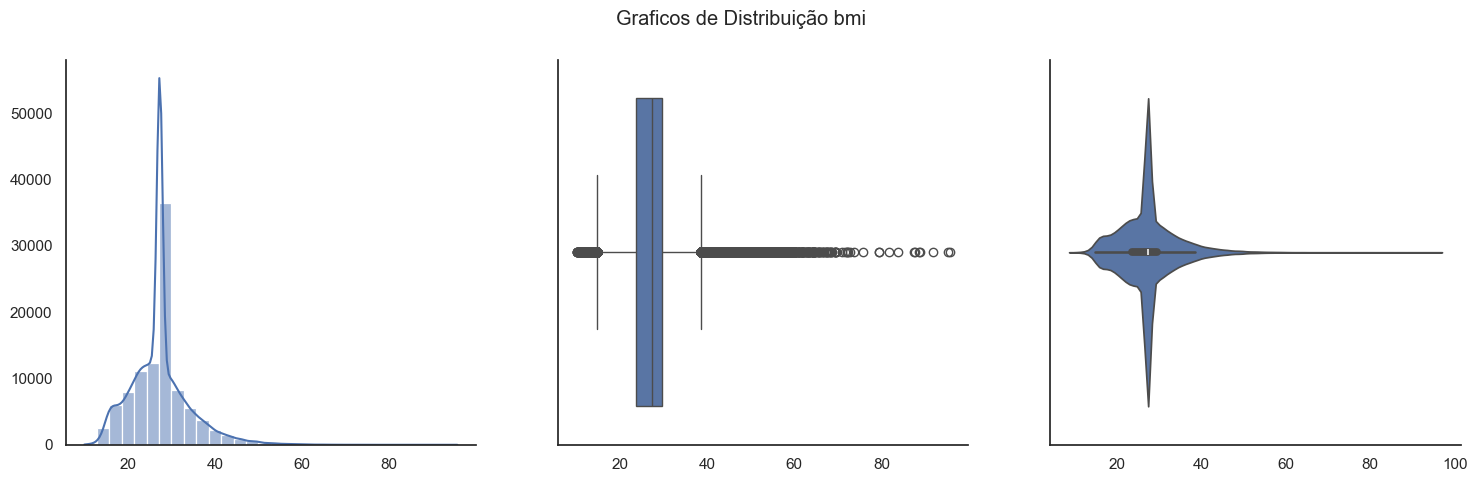

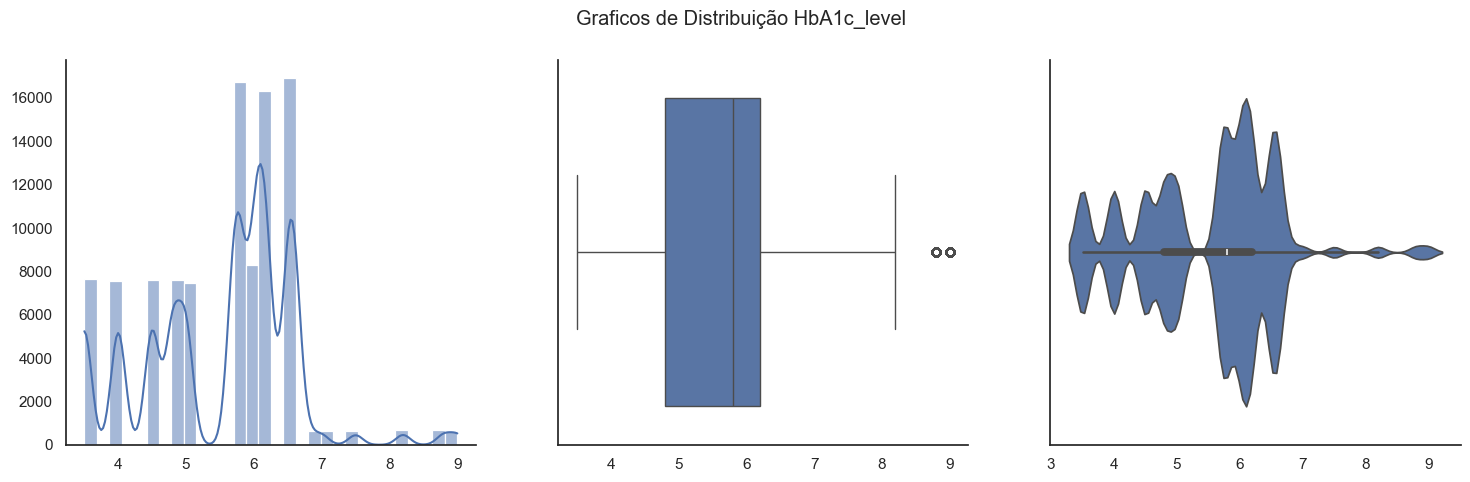

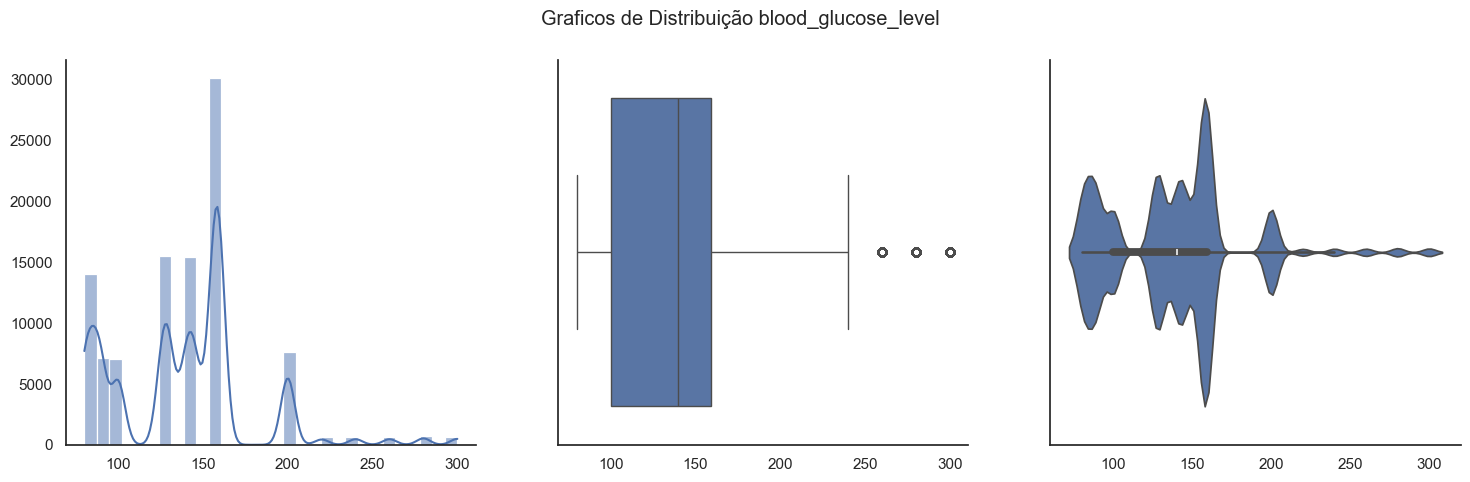

In [10]:
#Graficos de Distribuição das variaveis numericas
def distribuition_viz(col):
    datanums = dfanalysys.select_dtypes(exclude='object')
    for col in datanums.columns:
        sns.set_theme(style="white")
        #cores = [CINZA1,CINZA2,CINZA3,CINZA4,CINZA5]
        fig, axes = plt.subplots(1,3,figsize=(18,5))
        fig.suptitle(f"Graficos de Distribuição {col}")
        
        sns.histplot(dfanalysys,x=col,ax=axes[0],kde=True,bins=30)
        axes[0].set_ylabel(None)
        axes[0].set_xlabel(None)
        sns.despine()

        sns.boxplot(data,x=col,ax=axes[1])
        axes[1].set_xlabel(None)

        sns.despine()

        sns.violinplot(data,x=col,ax=axes[2])
        axes[2].set_xlabel(None)
        
        sns.despine()


distribuition_viz(data.select_dtypes(exclude='object').columns)

No geral, as variaveis numericas apresentam distribuições não normais

### Analises Bivariadas

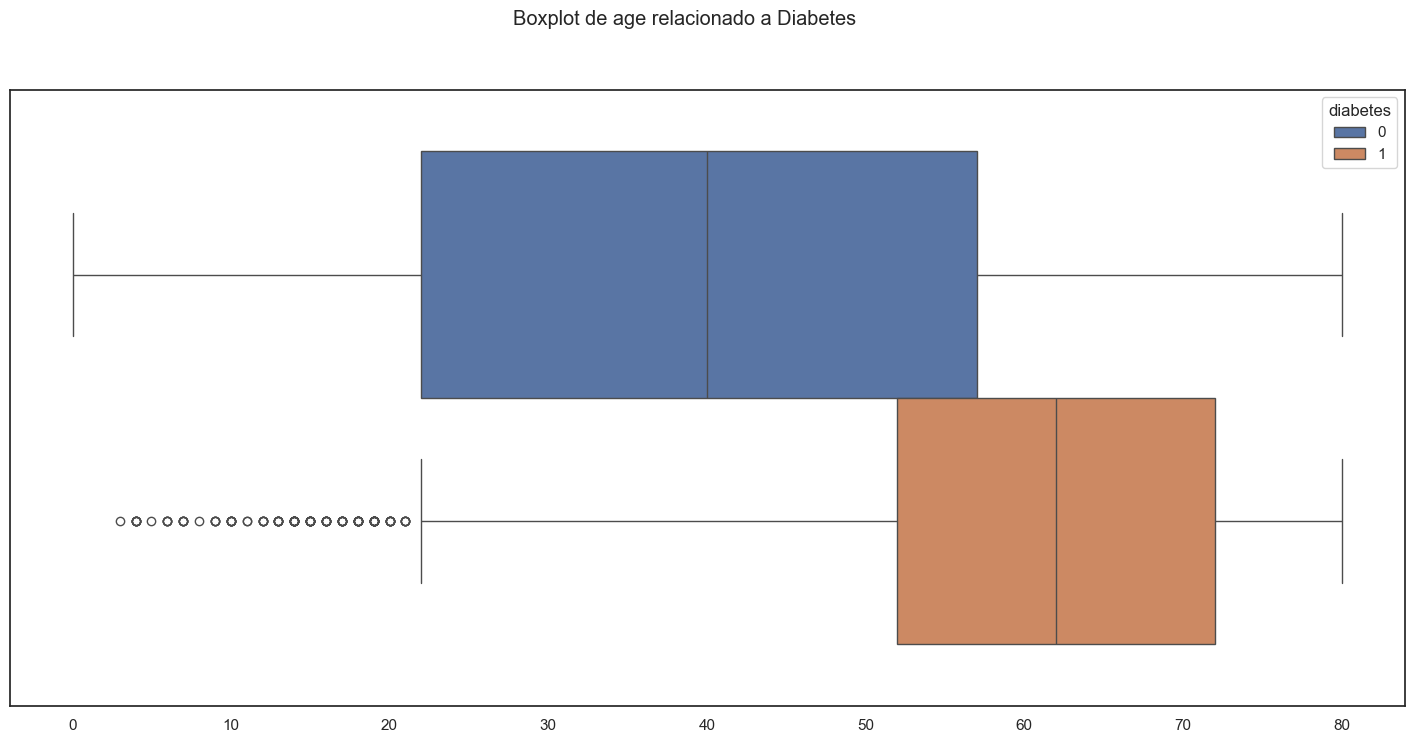

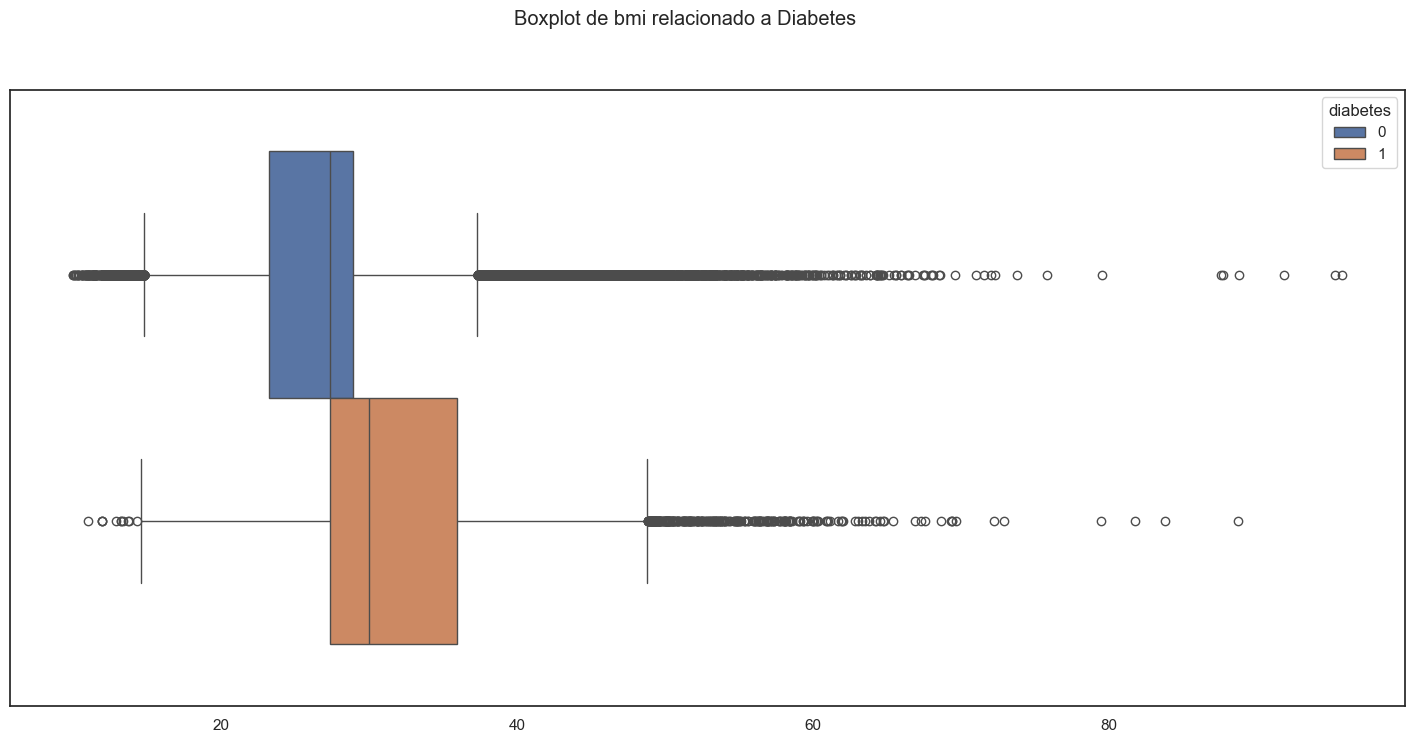

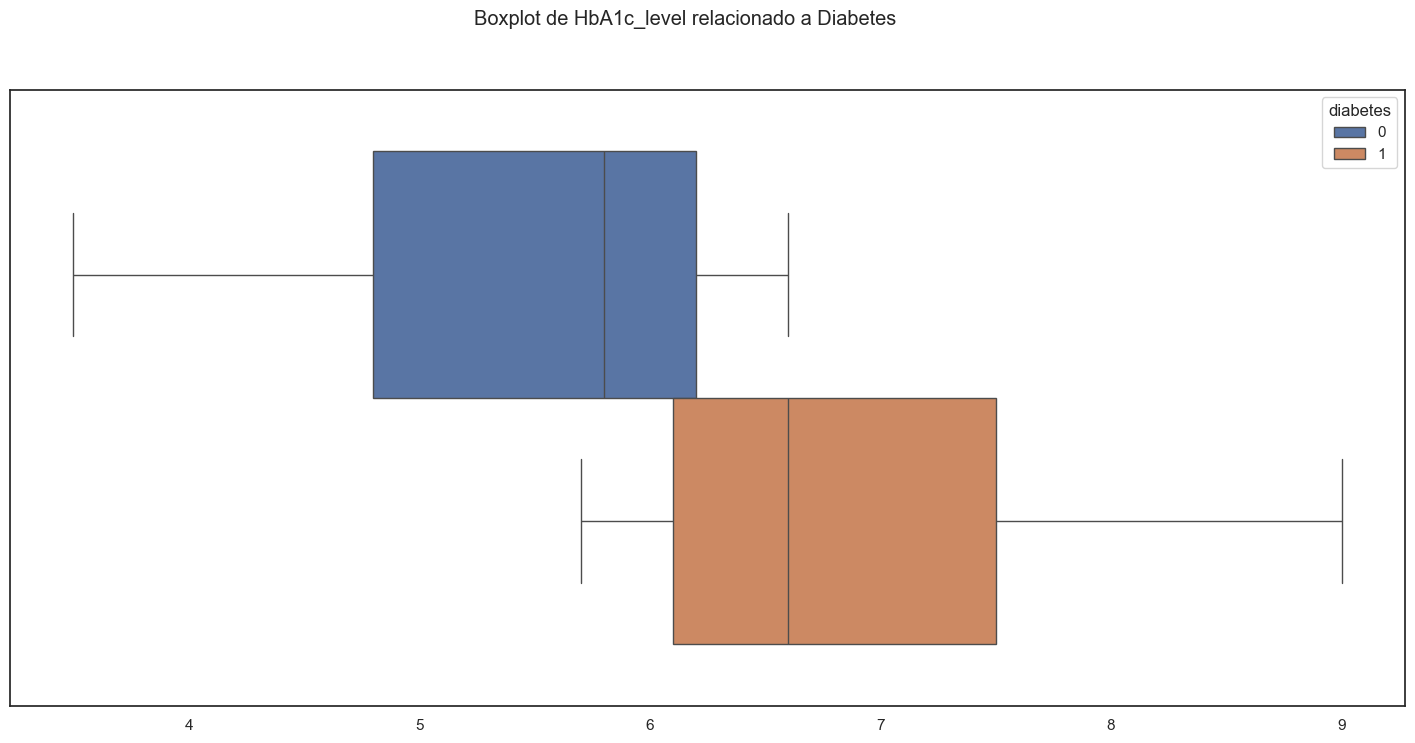

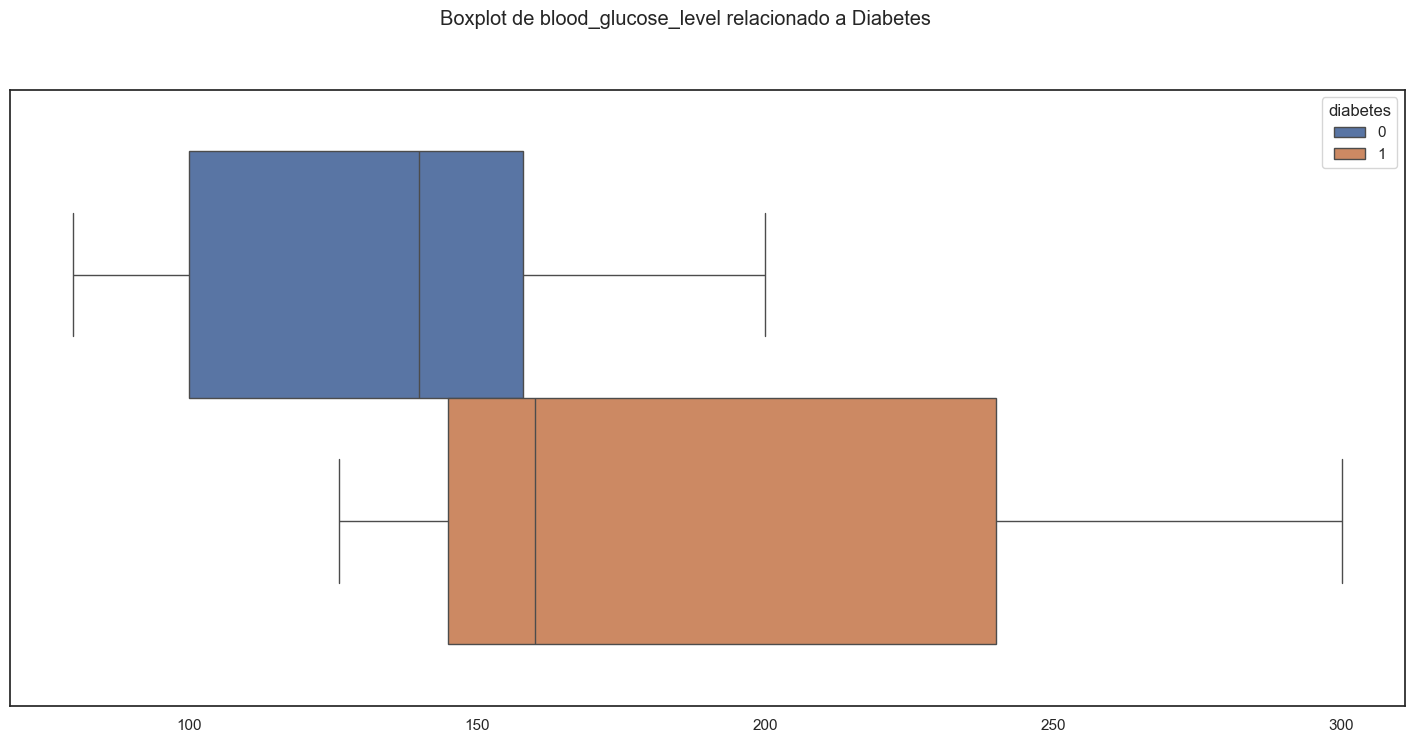

In [11]:
#Graficos de distribuição das variaveis numericas em relação a Diabetes
def distribuition_viz(col):
    datanums = dfanalysys.select_dtypes(exclude='object')
    for col in datanums.columns:
        sns.set_theme(style="white")
        #cores = [CINZA1,CINZA2,CINZA3,CINZA4,CINZA5]
        fig, ax = plt.subplots(1,1,figsize=(18,8))
        fig.suptitle(f"Boxplot de {col} relacionado a Diabetes")
        sns.boxplot(data=dfanalysys,x=col,hue='diabetes')
        ax.set_xlabel(None)



distribuition_viz(data.select_dtypes(exclude='object').columns)

Os valores das variaveis tendem a ser mais altos para o grupo que possui diabetes

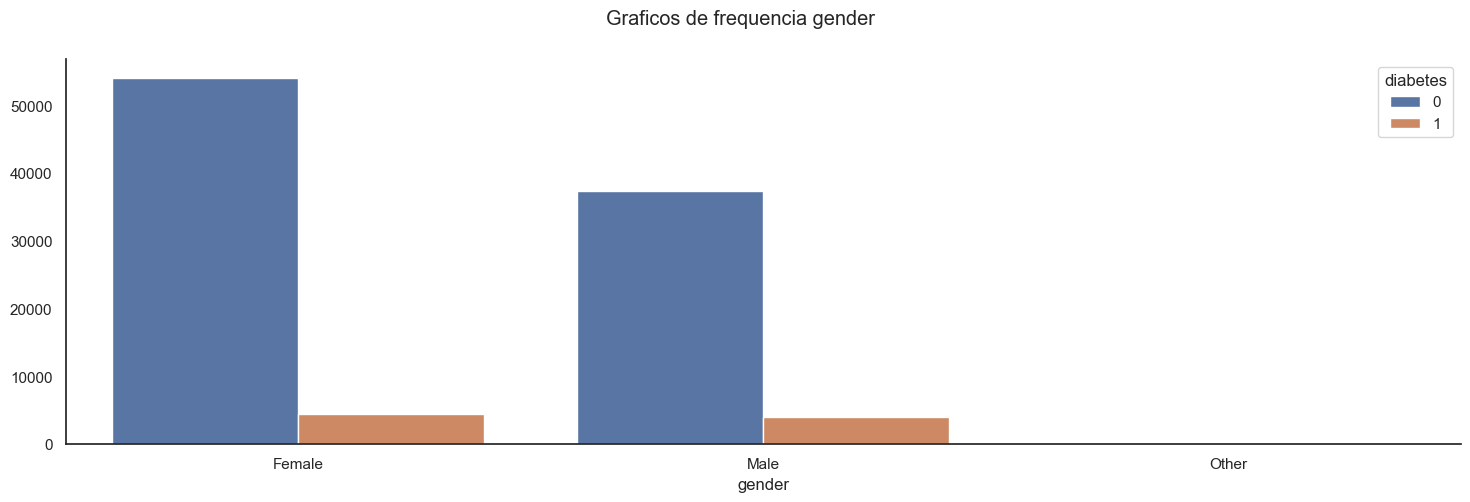

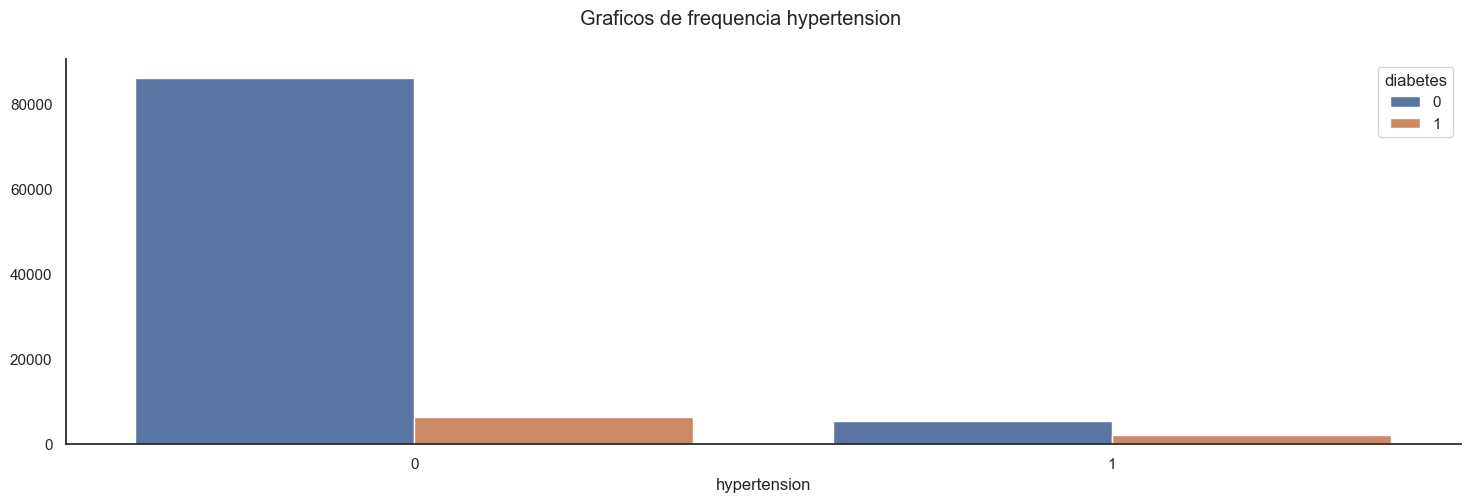

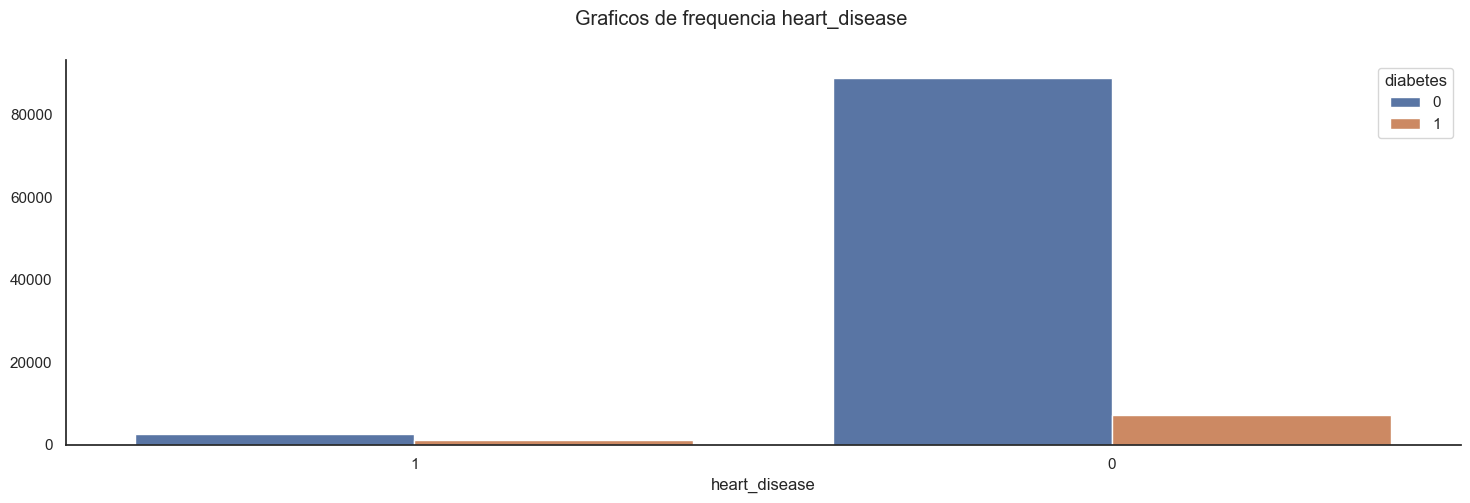

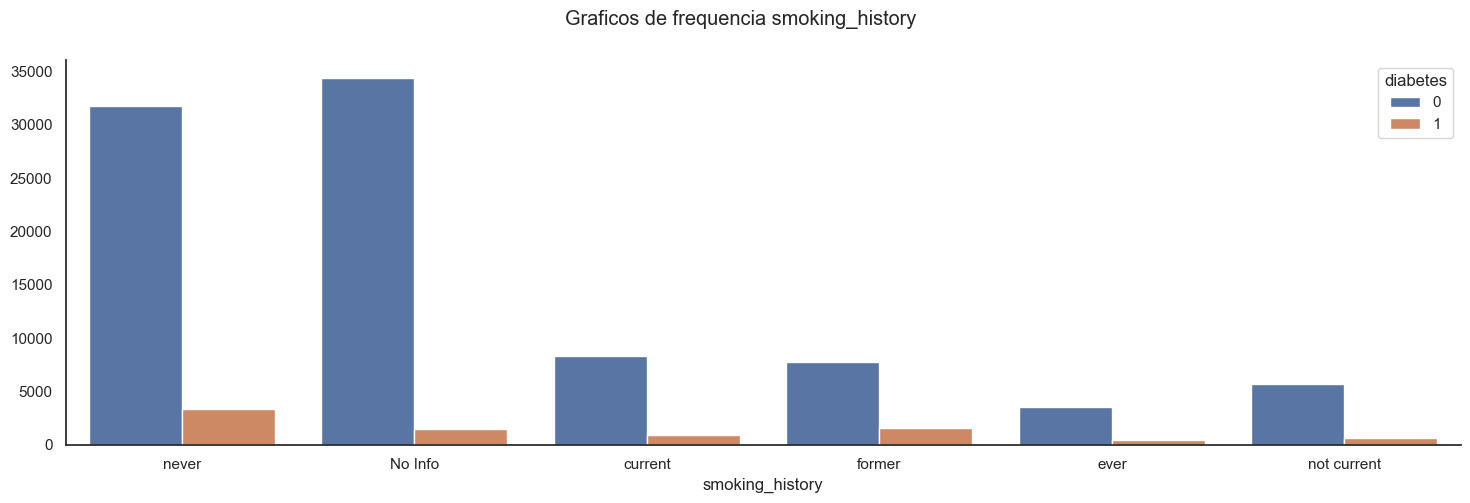

In [12]:
#graficos de frenquencia das variaveis categoricas em relação a diabetes
catlist = list(dfanalysys.select_dtypes(exclude=np.number).columns)
catlist.remove('diabetes')

def frequency_viz(col):
    dfcat = dfanalysys.select_dtypes(exclude=np.number)
    #dfcat.drop('diabetes',axis=1,inplace=True)
    for col in dfcat.columns:
        if  col == 'diabetes':
            break
        fig, axes = plt.subplots(1,1,figsize=(18,5))
        fig.suptitle(f"Graficos de frequencia {col}")
        sns.countplot(dfcat,x=col,hue='diabetes')
        axes.set_ylabel(None)
        sns.despine()

        plt.show()

frequency_viz(catlist)

Em todos os graficos acima, é mostrado que uma baixa quantidade de pessoas diabeticas

O que nos mostra que os dados estão desbalanceados

<Figure size 2000x2000 with 0 Axes>

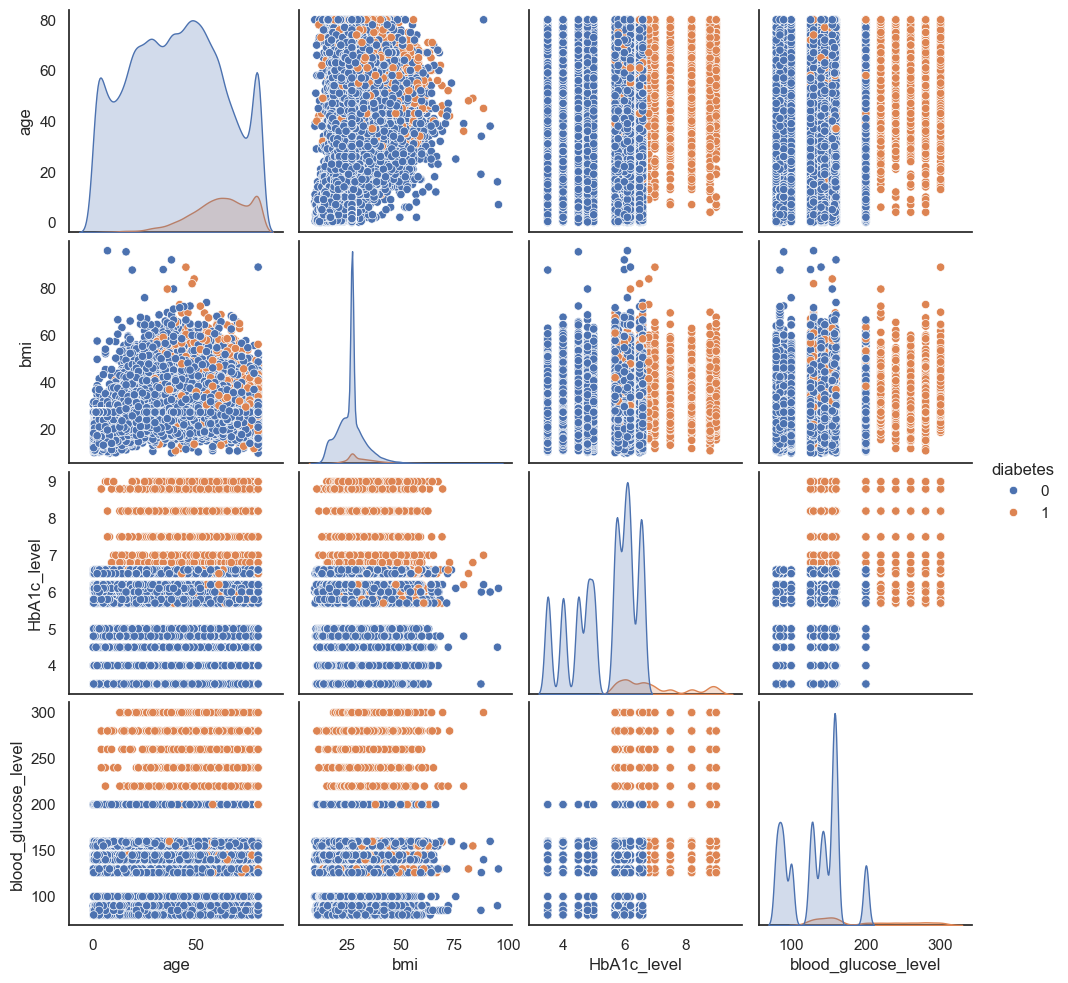

In [13]:
#pairplot
plt.figure(figsize=(20,20))
sns.pairplot(dfanalysys,hue='diabetes')
plt.show()

### Correlação

In [14]:
dfanalysys['diabetes'] = dfanalysys['diabetes'].astype(int)
dfanalysys

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


<Axes: >

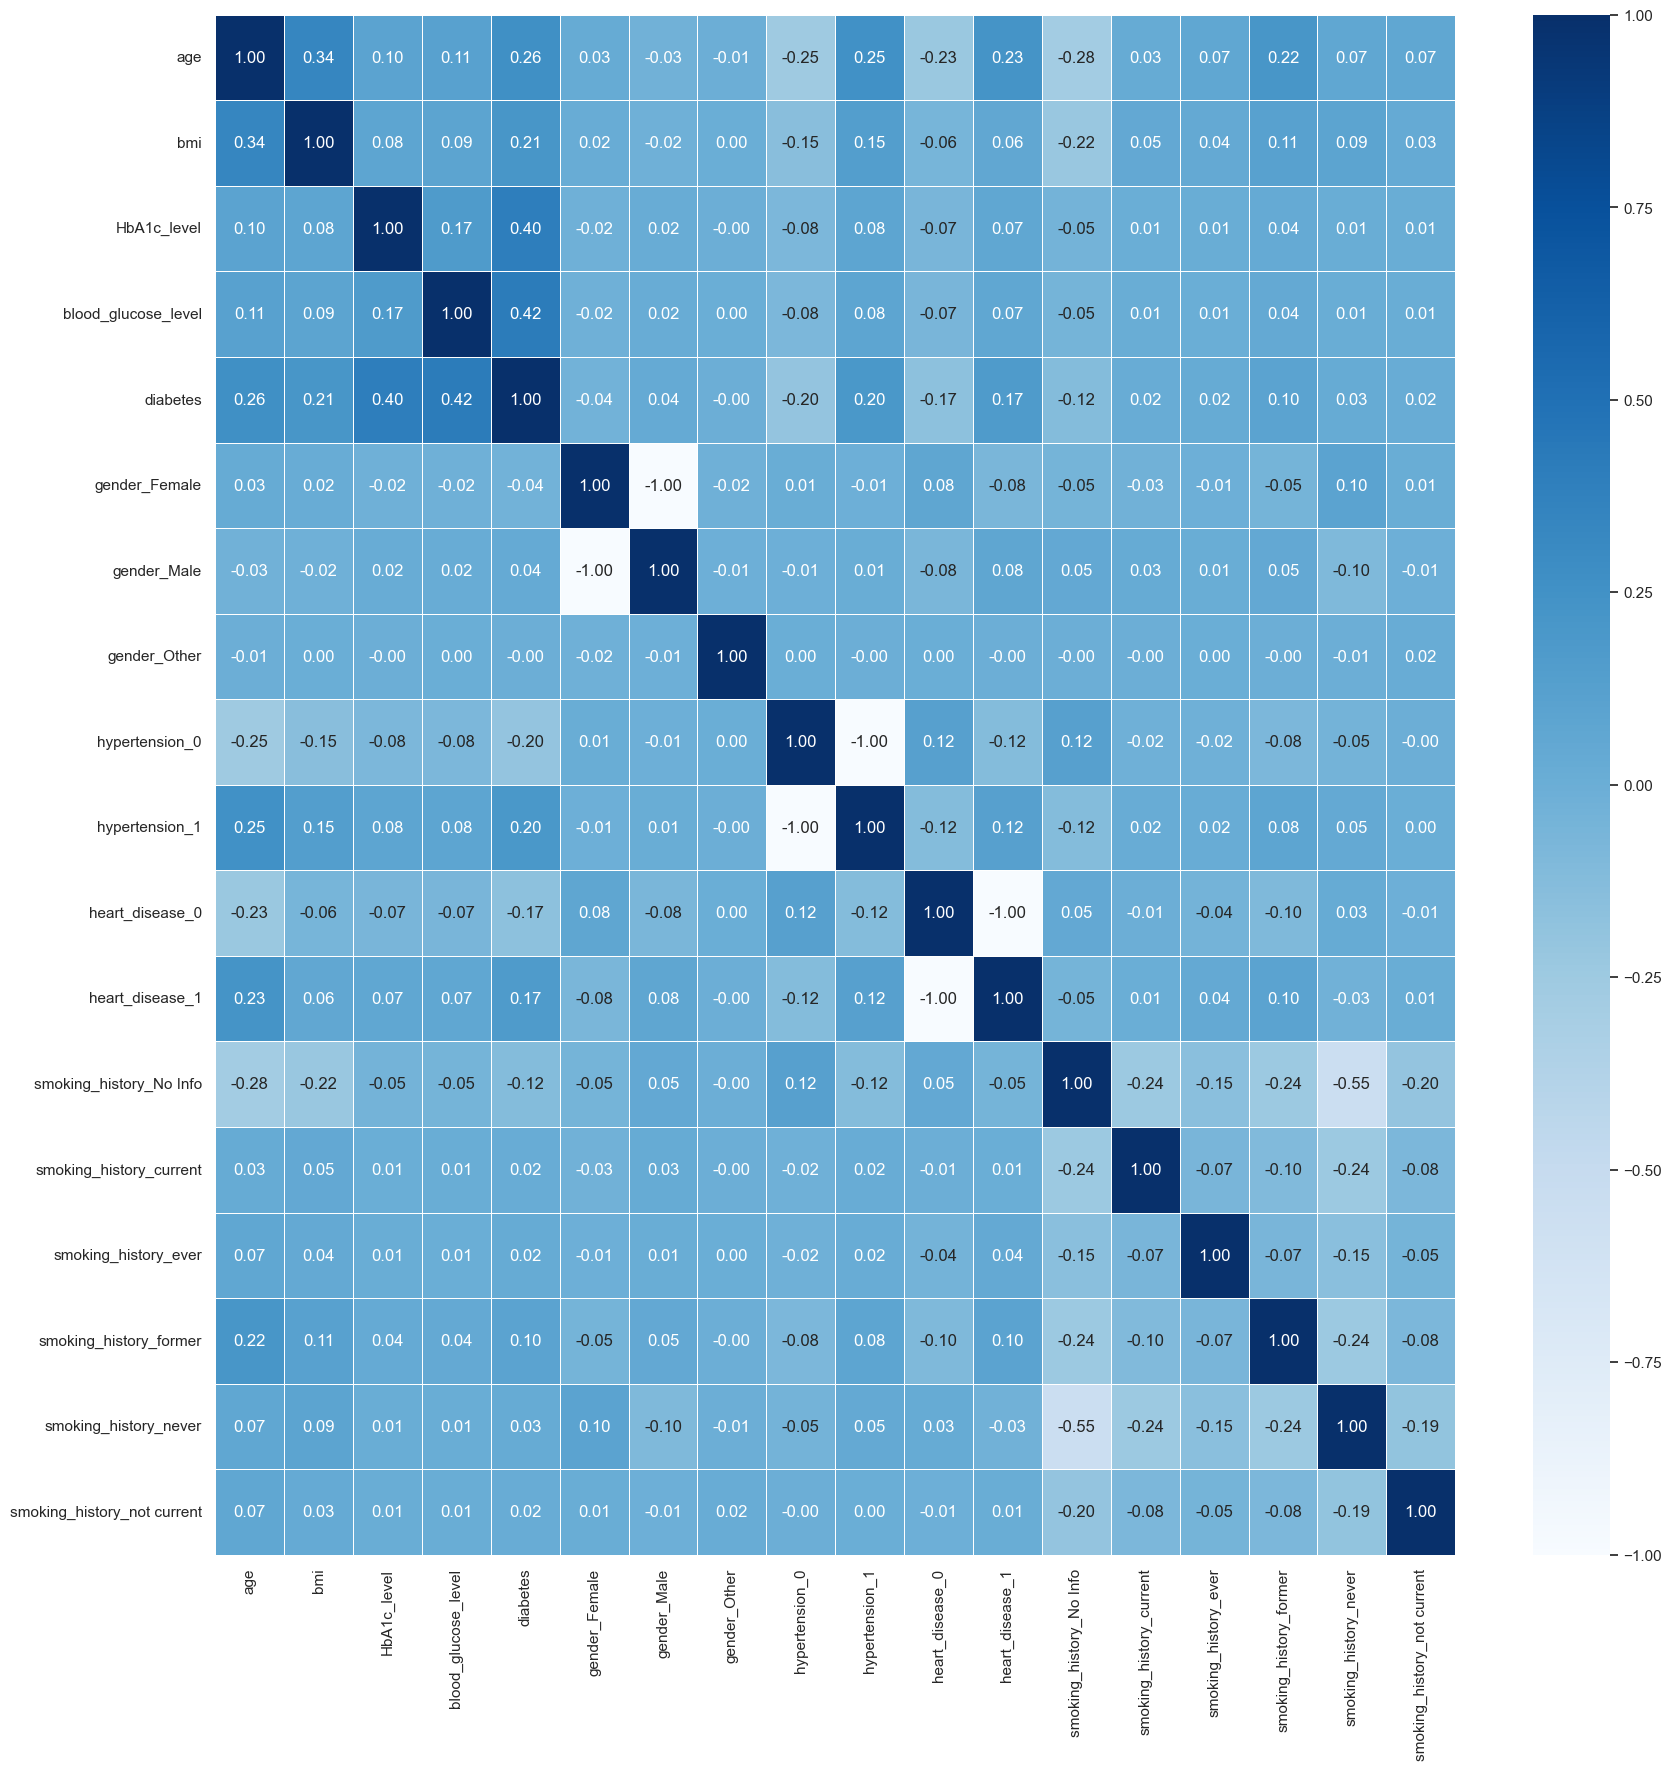

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(pd.get_dummies(dfanalysys).corr(),annot=True, cmap='Blues', linewidths=0.5, fmt='.2f')

As correlações mais fortes com diabetes seriam com as variaveis HbA1C_level e blood_glucose_level

### KNN

Inicialmente iremos fazer um tratamento basico dos dados para avaliar a performance do modelo

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [17]:
#criando copia do dataset para usar no modelo
dfmodel = data.copy()

In [18]:
#verificando variaveis da copia
dfmodel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [19]:
#preprocessamento dos dados

#importando bibliotecas de tratamento de dados
from sklearn.model_selection import train_test_split

#importando metricas de avaliação do modelo
from sklearn.metrics import classification_report, roc_auc_score,log_loss

#aplicando o get dummies nos dados
dfmodel = pd.get_dummies(dfmodel) 

#separando as variaveis explicativas e variavel alvo
X = dfmodel.drop(columns=['diabetes'])
y = dfmodel['diabetes']

#separando em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=2) #instanciando o modelo
KNN.fit(X_train, y_train) #treinando o modelo
y_pred_knn = KNN.predict(X_test) #prevendo dados

In [21]:
#metricas do modelo
print(classification_report(y_test, y_pred_knn))
print('Roc_auc_score: ',roc_auc_score(y_test, y_pred_knn))
print('Log_loss: ',log_loss(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18292
           1       0.92      0.50      0.65      1708

    accuracy                           0.95     20000
   macro avg       0.94      0.75      0.81     20000
weighted avg       0.95      0.95      0.95     20000

Roc_auc_score:  0.7484260661422227
Log_loss:  1.6778320652634036


Observamos que o modelo tem bastante dificuldade de classificar as amostrar como true para diabetes devido ao fato te termos poucas amostras de pessoas diabeticas

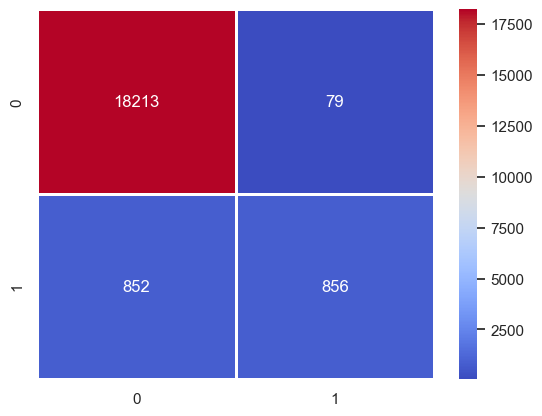

In [22]:
#matriz de confusão
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.show()

Na matriz de confusão do modelo, vamos que o numero de falsos negativos é bem mais alto em relação ao numero de falsos positivos

Vamos ajustar os dados do modelo buscando melhor performance 

In [23]:
#criando copia do dataset para usar no modelo ajustado
dfmodel1 = data.copy()
dfmodel1

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [24]:
#tratamento dos dados

dfmodel1['hypertension'] = dfmodel1['hypertension'].astype(str)
dfmodel1['heart_disease'] = dfmodel1['heart_disease'].astype(str)

#subustituindo categorias da vaviavel smoking_history
def substituicao_smoking_history(smoking_status):
    if smoking_status in ['never', 'No Info']:
        return 'non-smoker'
    elif smoking_status == 'current':
        return 'current'
    elif smoking_status in ['ever', 'former', 'not current']:
        return 'past_smoker'

dfmodel1['smoking_history'] = dfmodel1['smoking_history'].apply(substituicao_smoking_history)

#removendo o genero 'Other' 
dfmodel1 = dfmodel1[dfmodel1['gender'] != 'Other']

#aplicando o get dummies nos dados
dfmodel1 = pd.get_dummies(dfmodel1) 

#separando as variaveis explicativas e variavel alvo
X1 = dfmodel1.drop(columns=['diabetes'])
y1 = dfmodel1['diabetes']

#balanceando os dados
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X1, y1)

#separando os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [25]:
#aplicando modelo
KNN2 = KNeighborsClassifier(n_neighbors=3) #irei aumentar a quantidade de neighbors
KNN2.fit(X_train,y_train) #treinando o modelo
y_pred_knn2 = KNN2.predict(X_test) #prevendo dados

In [26]:
#metricas do modelo
print(classification_report(y_test, y_pred_knn2))
print('Roc_auc_score: ',roc_auc_score(y_test, y_pred_knn2))
print('Log_loss: ',log_loss(y_test, y_pred_knn2))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96     18258
           1       0.94      0.98      0.96     18335

    accuracy                           0.96     36593
   macro avg       0.96      0.96      0.96     36593
weighted avg       0.96      0.96      0.96     36593

Roc_auc_score:  0.9604643027851291
Log_loss:  1.4233071665967343


Podemos observar que para diabetes positivo, as metricas melhoraram bastante após o tratamento e balanceamento dos dados

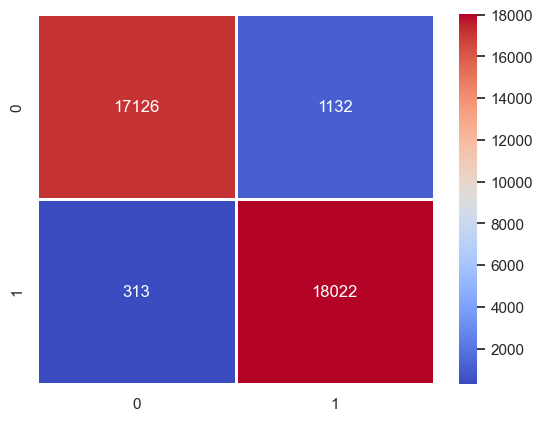

In [27]:
#matriz de confusão
cf_matrix1 = confusion_matrix(y_test, y_pred_knn2)
sns.heatmap(cf_matrix1, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.show()

Na matriz de confusão do modelo com os ajustes, vemos que o numero de falsos positivos é bem mais alto em relação ao numero de falsos negativos, porém as metricas do modelo tiveram uma melhora significativa 

Conclusão

* No conjunto de dados a maioria dos dados são de pessoas não diabeticas, o que dificulta a relação entre as variaveis alvo e a variavel objetivo
* O modelo precisa de dados bem ajustados para performar bem
* As variaveis HbA1C_level e blood_glucose_level são as que mais influenciam para a diabetes positivo
* Se faz necessario testar outros modelo de classificação para tentar obter uma melhor performance nas previsões